Revision:

Khan Academy's [introduction to vectors](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra).  
Khan Academy's [introduction to matrices](https://www.khanacademy.org/math/precalculus/precalc-matrices).

With multiple input units and multiple hidden units, the weights between them will require two indices: $w_{ij}$ where $i$ denotes input units and $j$ are the hidden units.

For example, the following image shows a network, with its input units labeled $x_1$, $x_2$, and $x_3$, and its hidden nodes labeled $h_1$ and $h_2$, and includes all of the weights between the input layer and the hidden layer, labeled with their appropriate $w_{ij}$ indices:

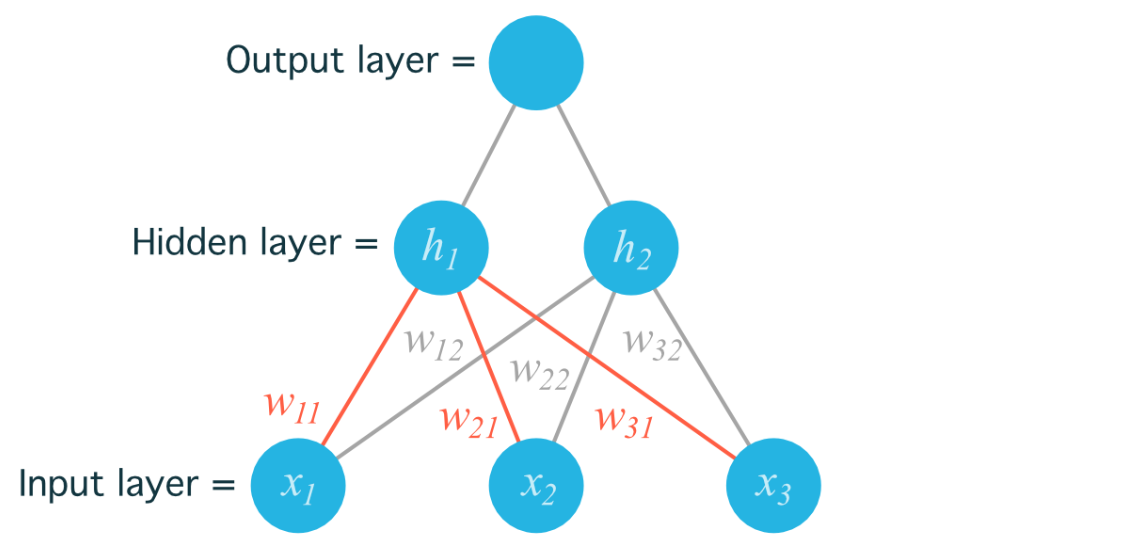

The weights need to be stored in a **matrix**, indexed as $w_{ij}$. Each **row** in the matrix will correspond to the weights **leading out** of a **single input unit**, and each column will correspond to the weights **leading in** to a **single hidden unit**. For our three input units and two hidden units, the weights matrix looks like this:

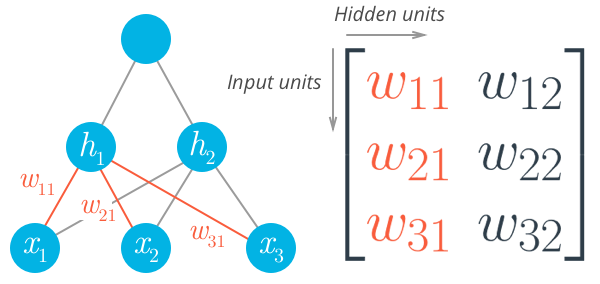
<center><h4>Weights matrix for 3 input units and 2 hidden units</h4></center>

To initialize these weights in NumPy, we have to provide the shape of the matrix. If `features` is a 2D array containing the input data:

In [24]:
import numpy as np

# features
features = np.array([[0.49671415, -0.1382643 ,  0.64768854]])

# Number of records and input units
n_records, n_inputs = features.shape

# Number of hidden units
n_hidden = 2

weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))

In [25]:
features.shape

(1, 3)

In [9]:
weights_input_to_hidden

array([[ 0.42652813, -0.63270687],
       [ 0.68054586,  0.38982435],
       [ 0.380389  ,  1.0319571 ]])

This creates a 2D array (i.e. a matrix) named `weights_input_to_hidden` with dimensions `n_inputs` by `n_hidden`. The input to a hidden unit is the sum of all the inputs multiplied by the hidden unit's weights. So for each hidden layer unit, $h_j$, we need to calculate the following:

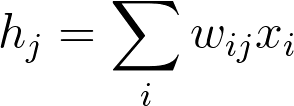

To do that, we now need to use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication). For this part you'll only need to know how to multiply a matrix with a vector.

In this case, we're multiplying the inputs (a row vector here) by the weights. To do this, you take the dot (inner) product of the inputs with each column in the weights matrix. For example, to calculate the input to the first hidden unit, $j = 1$, you'd take the dot product of the inputs with the first column of the weights matrix, like so:

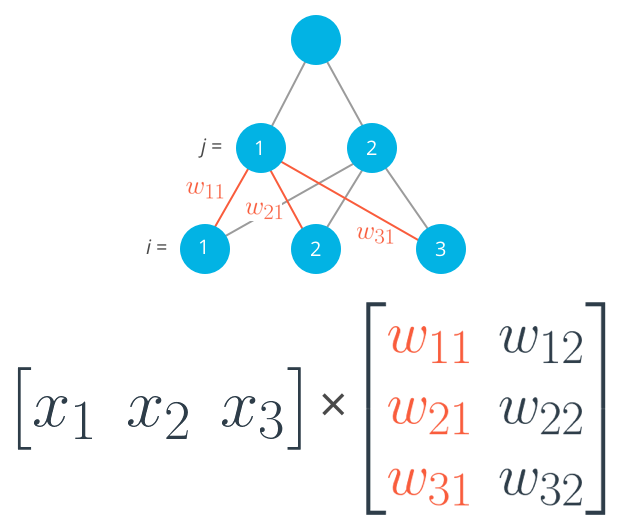
<center><h4>Calculating the input to the first hidden unit with the first column of the weights matrix</h4></center>

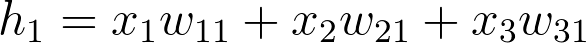

And for the second hidden layer input, you calculate the dot product of the inputs with the second column. And so on and so forth.

In NumPy, you can do this for all the inputs and all the outputs at once using `np.dot`

In [6]:
hidden_inputs = np.dot(n_inputs, weights_input_to_hidden)

You could also define your weights matrix such that it has dimensions `n_hidden` by `n_inputs` then multiply like so where the inputs form a _column vector_:

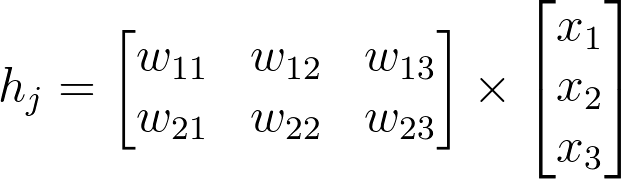

**Note:** The weight indices have changed in the above image and no longer match up with the labels used in the earlier diagrams. That's because, in matrix notation, the row index always precedes the column index, so it would be misleading to label them the way we did in the neural net diagram. Just keep in mind that this is the same weight matrix as before, but rotated so the first column is now the first row, and the second column is now the second row. If we were to use the labels from the earlier diagram, the weights would fit into the matrix in the following locations:

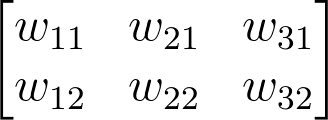
<h4><center>Weight matrix shown with labels matching earlier diagrams</center></h4>

Remember, the above is **not** a correct view of the **indices**, but it uses the labels from the earlier neural net diagrams to show you where each weight ends up in the matrix.

The important thing with matrix multiplication is that **_the dimensions match_**. For matrix multiplication to work, there has to be the same number of elements in the dot products. In the first example, there are three columns in the input vector, and three rows in the weights matrix. In the second example, there are three columns in the weights matrix and three rows in the input vector. If the dimensions don't match, you'll get this:

The dot product can't be computed for a 3x2 matrix and 3-element array. That's because the 2 columns in the matrix don't match the number of elements in the array. Some of the dimensions that could work would be the following:

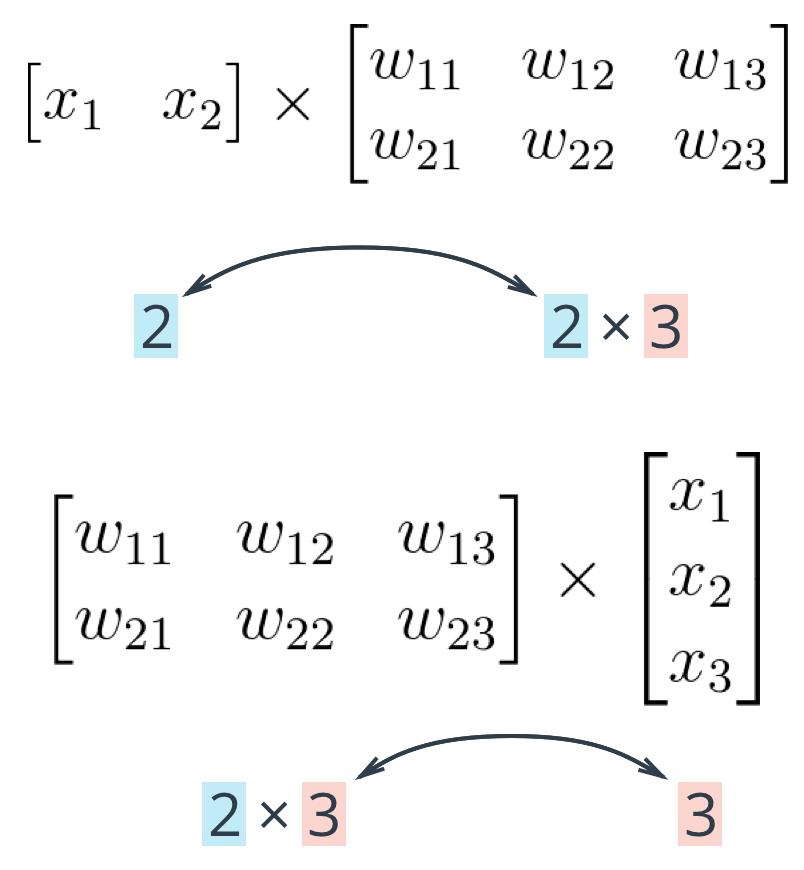

The rule is that if you're multiplying an _array_ from the left, the array must have the same number of elements as there are rows in the matrix. And if you're multiplying the _matrix_ from the left, the number of columns in the matrix must equal the number of elements in the array on the right.

### Making a column vector
You see above that sometimes you'll want a column vector, even though by default NumPy arrays work like row vectors. It's possible to get the transpose of an array like so `arr.T`, but for a 1D array, the transpose will return a row vector. Instead, use `arr[:, None]` to create a column vector:

In [36]:
features = np.array([0.49671415, -0.1382643, 0.64768854])

In [37]:
features.shape

(3,)

In [38]:
print(features)

[ 0.49671415 -0.1382643   0.64768854]


In [39]:
print(features.T)

[ 0.49671415 -0.1382643   0.64768854]


In [40]:
print(features[:, None])

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


Alternatively, you can create arrays with two dimensions. Then, you can use arr.T to get the column vector.

In [41]:
np.array(features, ndmin=2)

array([[ 0.49671415, -0.1382643 ,  0.64768854]])

In [42]:
np.array(features, ndmin=2).shape

(1, 3)

In [43]:
np.array(features, ndmin=2).T

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

Setting features as 2 dimensional from scratch...

In [32]:
features = np.array([[0.49671415, -0.1382643 ,  0.64768854]])

In [33]:
features.shape

(1, 3)

In [34]:
print(features.T)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [35]:
print(features[:, None])

[[[ 0.49671415 -0.1382643   0.64768854]]]


I personally prefer keeping all vectors as 1D arrays, it just works better in my head.

### Programming quiz
Below, you'll implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers.

Things to do:

- Calculate the input to the hidden layer.
- Calculate the hidden layer output.
- Calculate the input to the output layer.
- Calculate the output of the network.

In [45]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]
